#### Reviewing TSCA and other lists with the lens of the new universe

Created: 06 November 2023<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks','')
raw_dir= TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(interim_dir+'final_universe_categorisations_wtsca_active_constraints_061123.xlsx', index_col = [0])

In [4]:
df.shape

(15414, 87)

In [5]:
df

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,...,tsca_centroid_id2,tsca_analogues,tsca_dist,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks
0,DTXSID6071908,DSSTox_High,N-Ethyl-N-((pentadecafluoroheptyl)sulphonyl)gl...,68957-63-1,Single Compound,CCN(CC(O)=O)S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)...,"InChI=1S/C11H8F15NO4S/c1-2-27(3-4(28)29)32(30,...",IOQHTIQMCISFKB-UHFFFAOYSA-N,C11H8F15NO4S,535.22,...,DTXSID1071662,DTXSID6071908,0.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID8071358,DSSTox_High,N-Methyl-perfluoro-1-heptanesulfonamide,68259-14-3,Single Compound,CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,"InChI=1S/C8H4F15NO2S/c1-24-27(25,26)8(22,23)6(...",KDHCALLFPWZTPN-UHFFFAOYSA-N,C8H4F15NO2S,463.16,...,DTXSID1071662,DTXSID8071358,0.625,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID1071907,DSSTox_High,N-Ethylpentadecafluoro-1-heptanesulfonamide,68957-62-0,Single Compound,CCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C9H6F15NO2S/c1-2-25-28(26,27)9(23,24)...",WMOMXEHEPXLIAV-UHFFFAOYSA-N,C9H6F15NO2S,477.19,...,DTXSID1071662,DTXSID1071907,0.600,0.0,NaN,NaN,DTXSID6027426,DTXSID1071907,0.6,0.0
3,DTXSID001026645,DSSTox_Low,"1,1,2,2,3,3,4,4,5,5,6,6,7,7,7-Pentadecafluoro-...",167398-54-1,Single Compound,OCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,"InChI=1S/C9H6F15NO3S/c10-3(11,4(12,13)6(16,17)...",LJJUSVBJKZXMCP-UHFFFAOYSA-N,C9H6F15NO3S,493.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID301026644,DSSTox_Low,(Perfluoroheptyl)(sulfonylamino)acetic acid,1003194-00-0,Single Compound,OC(=O)CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,"InChI=1S/C9H4F15NO4S/c10-3(11,4(12,13)6(16,17)...",LAAXCIZXZCKWFF-UHFFFAOYSA-N,C9H4F15NO4S,507.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,FDWNJOAJRRFFMD-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F)[O-]...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15410,GJQJKNOGONJTMT-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=C(C(F)(F)C(F)(F)C(F)F)[O-].[Ag+],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15411,KTMCAOSDNBNPRO-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)F)[O-].[K+],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15412,UNHXQRJGZMXRPR-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.TSCA_STATUS.value_counts(dropna = False)

unclassified    14756
inactive          337
active            321
Name: TSCA_STATUS, dtype: int64

In [7]:
df[df['group_str'].isnull()]

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,...,tsca_centroid_id2,tsca_analogues,tsca_dist,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks


In [8]:
df.groupby(['category', 'subcategory', 'cluster_d', 'lvl_cluster_d']).size()

category                       subcategory  cluster_d  lvl_cluster_d
Fluorotelomer PFAA precursors  lt7          2.0        1.0               34
                                                       2.0               19
                                                       3.0              100
                                            3.0        1.0               24
                                                       2.0               19
                                                                       ... 
unclassified                   lt7          2.0        3.0               66
                                            3.0        1.0               15
                                                       2.0               34
                                                       3.0               61
                                                       4.0               92
Length: 63, dtype: int64

In [10]:
#df['group'] = df[['category','subcategory', 'cluster_d',  'lvl_cluster_d']].apply(tuple, axis = 1)
#df['group_str']=[str(e) for e in df['group'] ]

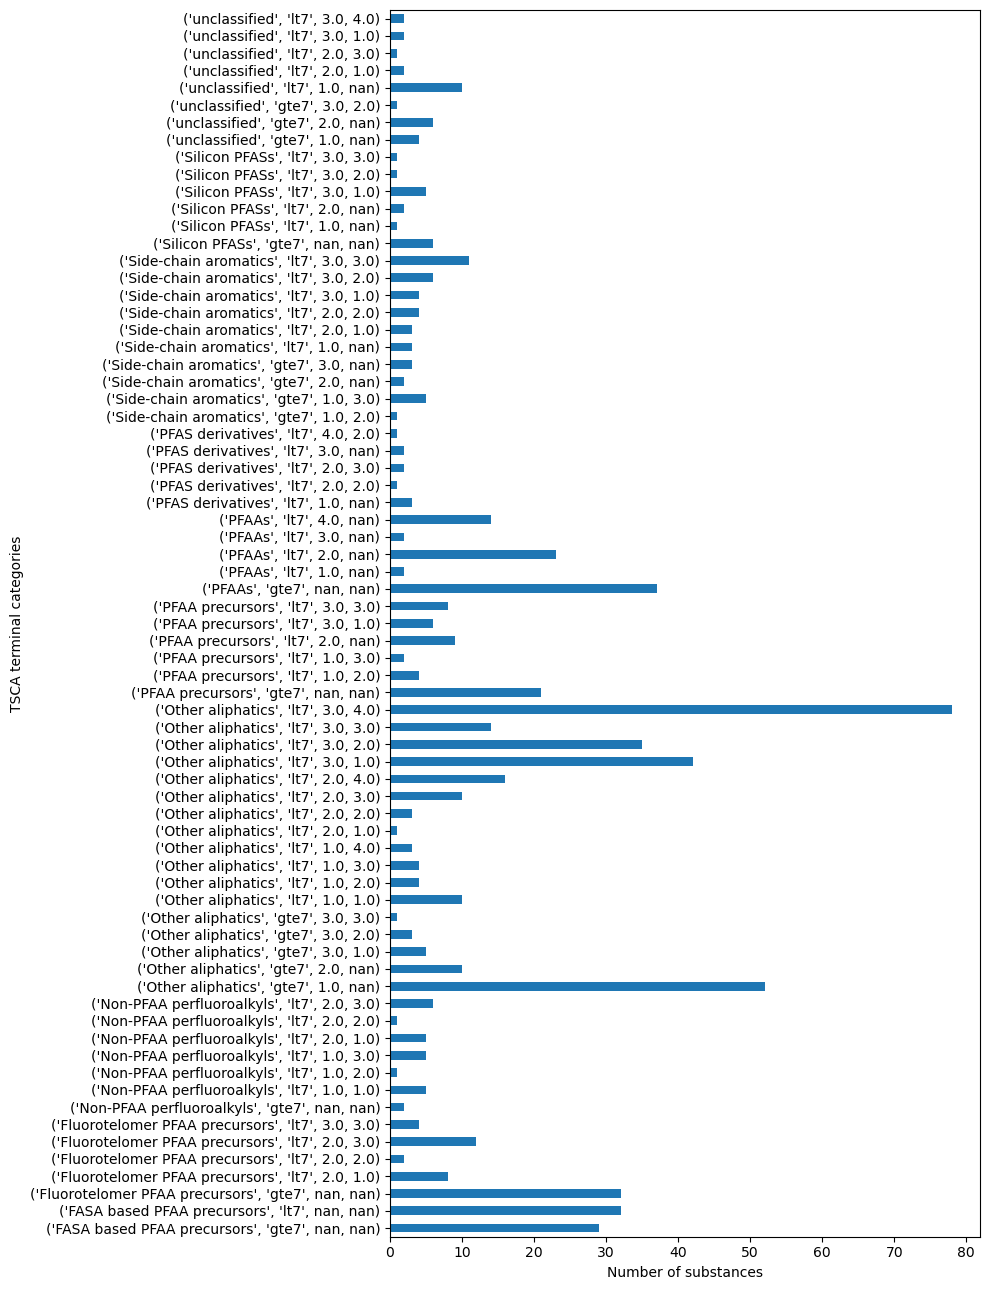

In [9]:
df[df['TSCA_STATUS']!='unclassified']['group_str'].value_counts().reset_index().sort_values('index').set_index('index').plot(kind = 'barh', figsize = (10,13), legend = False)
plt.ylabel('TSCA terminal categories')
plt.xlabel('Number of substances')
plt.tight_layout()
#plt.savefig(figures_dir+'Figure5.png', dpi = 300)

In [10]:
df[df['TSCA_STATUS']!= 'unclassified']['group_str'].value_counts().shape[0]/90

0.7888888888888889

In [11]:
df[df['TSCA_STATUS']!= 'unclassified']['group_str'].value_counts().reset_index()

,index,group_str
0,"('Other aliphatics', 'lt7', 3.0, 4.0)",78
1,"('Other aliphatics', 'gte7', 1.0, nan)",52
2,"('Other aliphatics', 'lt7', 3.0, 1.0)",42
3,"('PFAAs', 'gte7', nan, nan)",37
4,"('Other aliphatics', 'lt7', 3.0, 2.0)",35
...,...,...
66,"('unclassified', 'gte7', 3.0, 2.0)",1
67,"('Other aliphatics', 'lt7', 2.0, 1.0)",1
68,"('Side-chain aromatics', 'gte7', 1.0, 2.0)",1
69,"('unclassified', 'lt7', 2.0, 3.0)",1


In [12]:
df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index().shape[0]

57

In [13]:
df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index()

,index,group_str
0,"('Other aliphatics', 'lt7', 3.0, 4.0)",37
1,"('Fluorotelomer PFAA precursors', 'gte7', nan,...",24
2,"('PFAAs', 'gte7', nan, nan)",21
3,"('Other aliphatics', 'lt7', 3.0, 2.0)",18
4,"('FASA based PFAA precursors', 'gte7', nan, nan)",17
5,"('Other aliphatics', 'lt7', 2.0, 4.0)",14
6,"('FASA based PFAA precursors', 'lt7', nan, nan)",13
7,"('PFAAs', 'lt7', 4.0, nan)",12
8,"('PFAAs', 'lt7', 2.0, nan)",12
9,"('PFAA precursors', 'gte7', nan, nan)",11


In [14]:
df1 = pd.merge(df['group_str'].value_counts().reset_index(), df[df['TSCA_STATUS'] !='unclassified']['group_str'].value_counts().reset_index(), on = 'index', how = 'left')

In [15]:
df1 = pd.merge(df1, df[df['TSCA_STATUS']== 'active']['group_str'].value_counts().reset_index(), on = 'index', how = 'left')

In [16]:
df1.columns = ['Terminal_category', 'Total', 'TSCA_only', 'TSCA_active_only']

In [17]:
df1['TSCA_only'] =df1['TSCA_only'].replace(np.nan, 0)

In [18]:
df1['TSCA_active_only'] =df1['TSCA_active_only'].replace(np.nan, 0)

In [19]:
df1[df1['TSCA_only']==0].sort_values('Terminal_category')

,Terminal_category,Total,TSCA_only,TSCA_active_only
54,"('Fluorotelomer PFAA precursors', 'lt7', 1.0, ...",40,0.0,0.0
67,"('Fluorotelomer PFAA precursors', 'lt7', 3.0, ...",24,0.0,0.0
72,"('Fluorotelomer PFAA precursors', 'lt7', 3.0, ...",19,0.0,0.0
84,"('PFAA precursors', 'lt7', 1.0, 1.0)",7,0.0,0.0
81,"('PFAA precursors', 'lt7', 3.0, 2.0)",12,0.0,0.0
74,"('PFAS derivatives', 'lt7', 2.0, 1.0)",16,0.0,0.0
85,"('PFAS derivatives', 'lt7', 4.0, 1.0)",6,0.0,0.0
80,"('PFAS derivatives', 'lt7', 4.0, 3.0)",12,0.0,0.0
78,"('PFAS derivatives', 'lt7', 4.0, 4.0)",14,0.0,0.0
42,"('Side-chain aromatics', 'gte7', 1.0, 1.0)",74,0.0,0.0


In [25]:
#df1[df1['TSCA_active_only']==0].sort_values('Terminal_category')

In [20]:
df2 = df1.melt(id_vars = ['Terminal_category'], value_vars = ['Total', 'TSCA_only', 'TSCA_active_only'], var_name = 'Inventory')

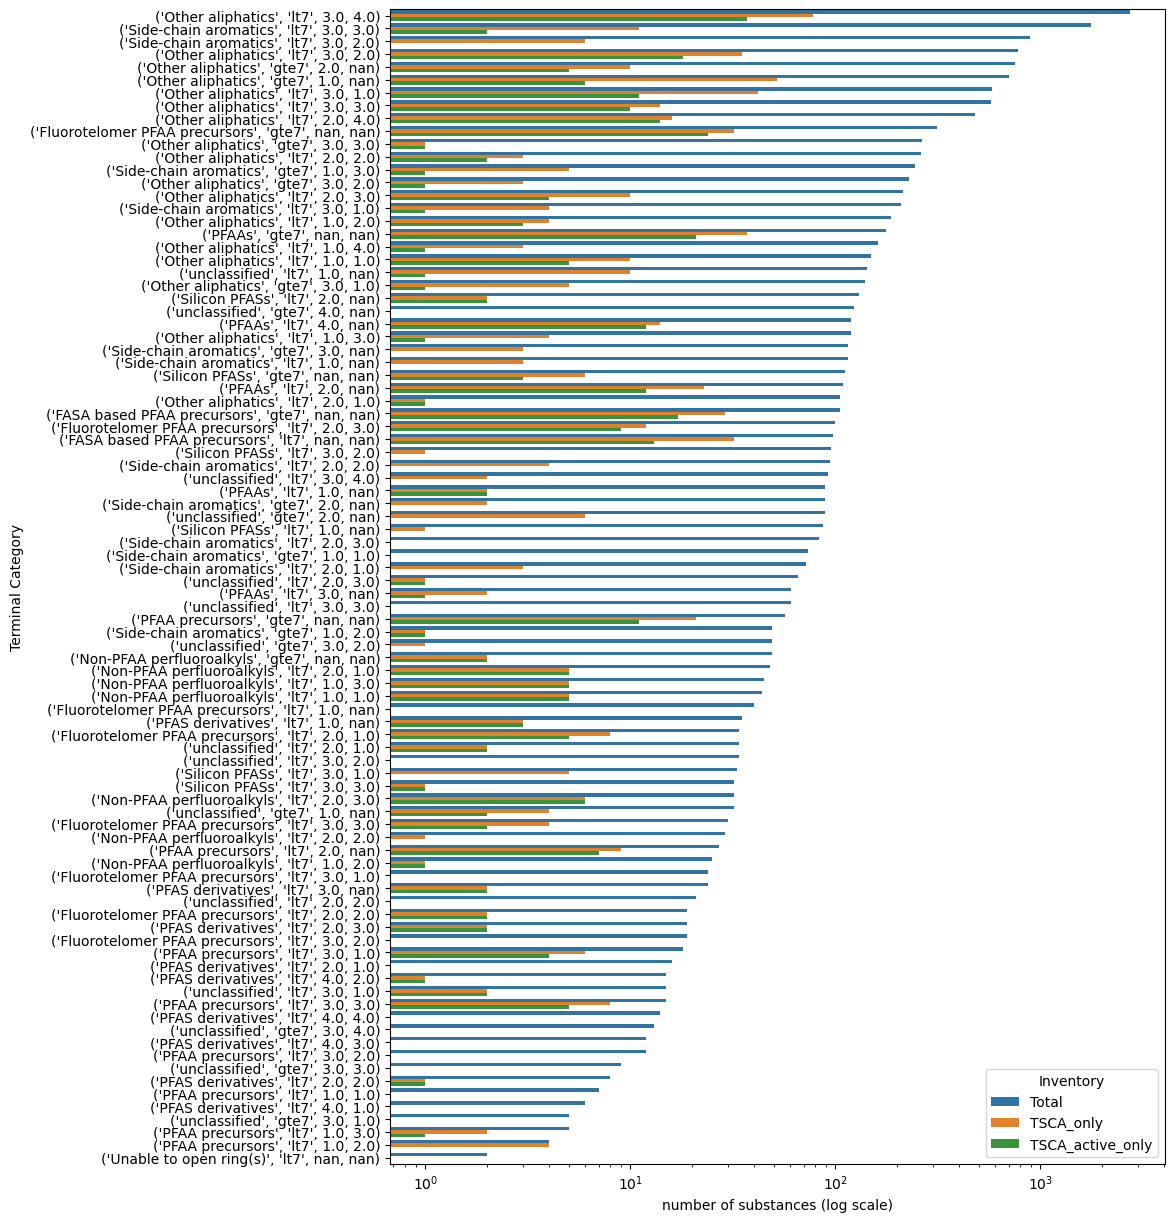

In [21]:
f,ax = plt.subplots(figsize = (10,15))
ax = sns.barplot(y = 'Terminal_category', x = 'value', hue = 'Inventory', data = df2)
ax.set_xscale('log')
ax.set_xlabel('number of substances (log scale)')
ax.set_ylabel('Terminal Category')
f.savefig(figures_dir+'FigureS3_061123.png', dpi = 300, bbox_inches = 'tight')

In [22]:
ccd = pd.read_excel(interim_dir+'CCD_CDR2020_271022.xlsx')


In [23]:
ccd.shape

(8017, 10)

In [24]:
pv_dict = {k:v for k,v in zip(ccd['DTXSID'], ccd['2019 NATIONALLY AGGREGATED PV-v1'])}

In [25]:
#pv_dict

In [26]:
df['CDR2019_NATIONAL_AGG_PV'] = df['dtxsid'].replace(pv_dict)

In [27]:
df['CDR2019_NATIONAL_AGG_PV'] = df['CDR2019_NATIONAL_AGG_PV'].apply(lambda x : np.nan if 'DTXSID' in x or 'UHFFFA' in x else x)

In [28]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          5
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
1,000,000 - <10,000,000 lb          1
500,000 - <1,000,000 lb             1
100,000,000 - <1,000,000,000 lb     1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [30]:
ccd = pd.read_excel(external_dir+'CDR2020_CCD_v2.xlsx')
ccd = ccd[ccd['DTXSID'].notnull()]
cdr2020_ids = ccd['DTXSID'].tolist()

In [31]:
df['CDR2020_STATUS'] = df['dtxsid'].apply(lambda x: 1 if x in cdr2020_ids else np.nan)

In [32]:
df['CDR2020_STATUS'].value_counts(dropna = False)

NaN    15332
1.0       82
Name: CDR2020_STATUS, dtype: int64

In [33]:
test_df = df[df['CDR2020_STATUS'] ==1]

In [34]:
test_df_pvt = pd.pivot_table(data = test_df, index = 'category', columns = 'CDR2019_NATIONAL_AGG_PV', values = 'CDR2020_STATUS', aggfunc = np.sum, fill_value = 0)


In [35]:
test_df_pvt = test_df_pvt.reset_index()

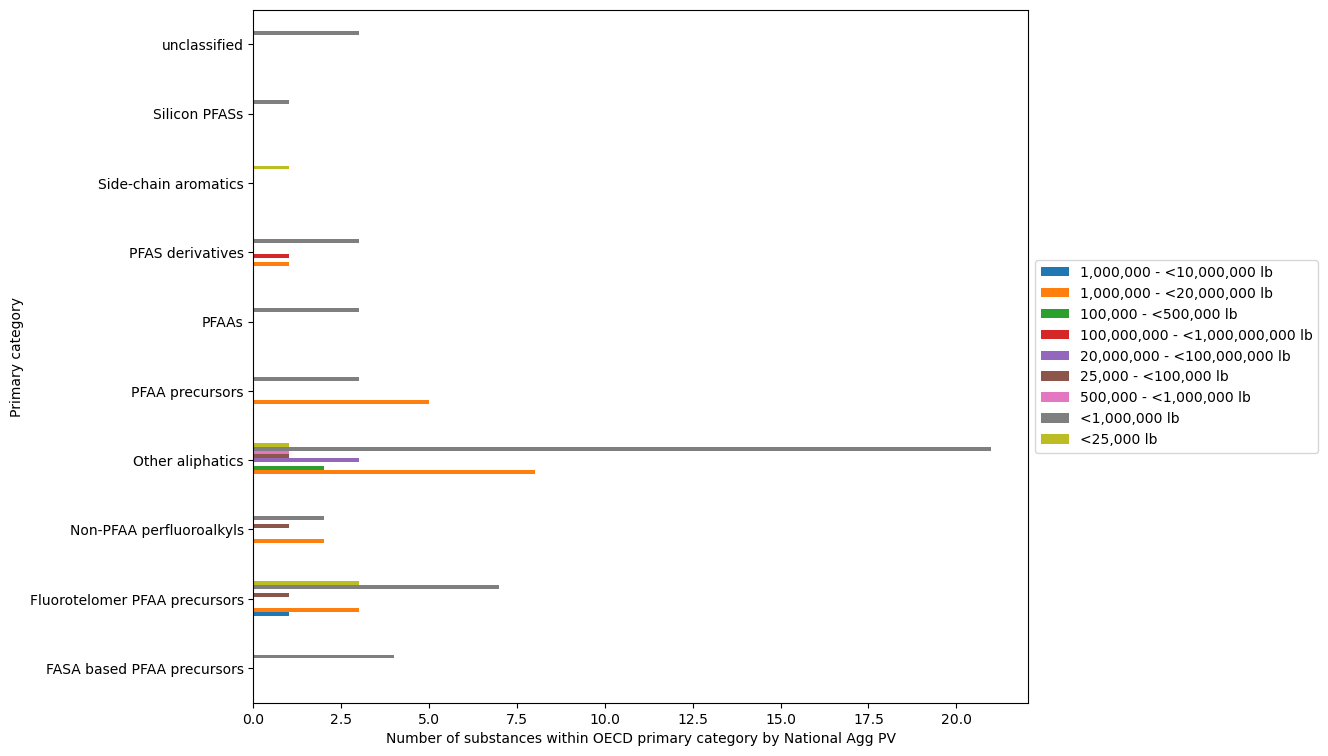

In [36]:
test_df_pvt.plot(x='category',
        kind='barh',
        stacked=False,figsize = (10,9)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Number of substances within OECD primary category by National Agg PV')
plt.ylabel('Primary category')
plt.savefig(figures_dir+'FigureS4_061123.png', dpi = 300, bbox_inches = 'tight');

In [37]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          5
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
1,000,000 - <10,000,000 lb          1
500,000 - <1,000,000 lb             1
100,000,000 - <1,000,000,000 lb     1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [40]:
df['CDR2019_NATIONAL_AGG_PV'].value_counts()

<1,000,000 lb                      47
1,000,000 - <20,000,000 lb         19
<25,000 lb                          5
25,000 - <100,000 lb                3
20,000,000 - <100,000,000 lb        3
100,000 - <500,000 lb               2
1,000,000 - <10,000,000 lb          1
500,000 - <1,000,000 lb             1
100,000,000 - <1,000,000,000 lb     1
Name: CDR2019_NATIONAL_AGG_PV, dtype: int64

In [42]:
writer = pd.ExcelWriter(interim_dir+'final_universe_categorisations_wCDR_061123.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df.to_excel(writer)

writer.close()
